<a href="https://colab.research.google.com/github/tgalkovskyi/deep-text-recognition-benchmark/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This can be executed in https://colab.research.google.com "Python 3 / GPU" runtime.

Next, download large model files from Google Drive, using hack: https://stackoverflow.com/questions/20665881/direct-download-from-google-drive-using-google-drive-api/32742700#32742700

In [1]:
output = !CUDA_VISIBLE_DEVICES=0 python demo.py \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn \
--image_folder demo_image/ \
--saved_model bn_models/best_accuracy.pth

In [3]:
!pip install pandas

     |████████████████████████████████| 10.1 MB 3.0 MB/s eta 0:00:01
  Using cached pytz-2019.3-py2.py3-none-any.whl (509 kB)


,img,id,label,conf
0,,demo_image/orginal1_অংক.png,অংক,0.9993
1,,demo_image/orginal1_অংশপ্রদান.png,অংশপ্রদান,0.9971
2,,demo_image/orginal1_অকার্যকর.png,অকার্যকর,0.9995
3,,demo_image/orginal1_অক্ষি.png,অক্ষি,0.9989
4,,demo_image/orginal1_অগ্নি-নির্বাপণ.png,অগ্নি-নির্বাপণ,0.7489
5,,demo_image/orginal1_অগ্নিগোলক.png,অগ্নিগোলক,0.9703
6,,demo_image/orginal1_অগ্রবর্তী.png,অগ্রবর্তী,0.9990
7,,demo_image/orginal1_অঙ্কিত.png,অঙ্কিত,0.9980
8,,demo_image/orginal1_অঙ্কুরিত.png,অঙ্কুরিত,0.9981
9,,demo_image/orginal1_অচল.png,অচল,0.9990

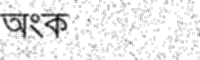
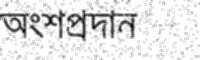
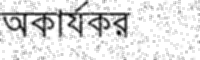
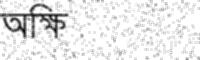
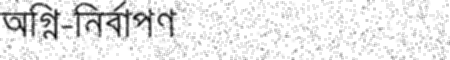
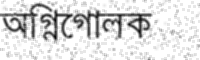
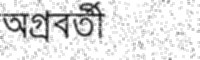
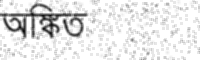
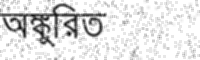
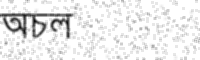
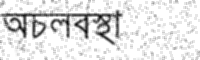
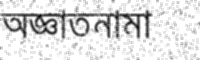
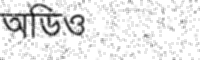
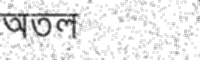
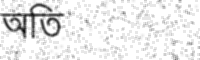
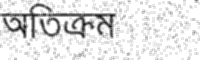
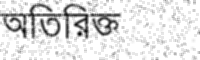
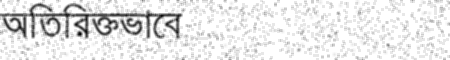
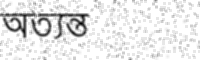
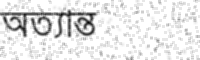
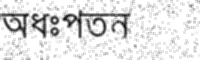
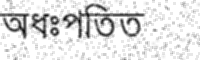
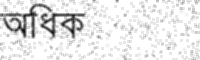
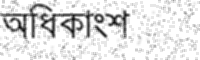
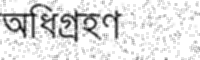
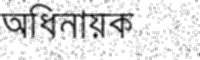
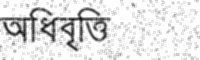
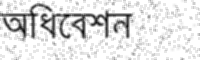

In [4]:
from IPython.core.display import display, HTML
from PIL import Image
import base64
import io
import pandas as pd

data = pd.DataFrame()
for ind, row in enumerate(output[output.index('image_path               \tpredicted_labels         \tconfidence score')+2:]):
  row = row.split('\t')
  filename = row[0].strip()
  label = row[1].strip()
  conf = row[2].strip()
  img = Image.open(filename)
  img_buffer = io.BytesIO()
  img.save(img_buffer, format="PNG")
  imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8") 

  data.loc[ind, 'img'] = '<img src="data:image/png;base64,{0:s}">'.format(imgStr)
  data.loc[ind, 'id'] = filename
  data.loc[ind, 'label'] = label
  data.loc[ind, 'conf'] = conf

html_all = data.to_html(escape=False)
display(HTML(html_all))